# Regions of Potential Growth - Analysis of Possible Advertising Markets 

In this project we will be looking at the viability of multiple advertising sectors. We will be using primary statistical measurements in order to aid our decision making. We will be attempting to mix confidence in affecting a wide range in a given market with the cost of advertising in that same market.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
FCC=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [6]:
FCC.head()
print(FCC.shape)

(18175, 136)


### Exploratory Visualization

In order to avoid spending money on organizing a survey, we look instead to [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). THis is helpful since freeCodeCamp runs a published medium which attracts roughly 400,000 readers from multiple coding backgrounds. This survey has a greater reach than we could generate while being free as well.

The survey data is found publicly on [Github](https://github.com/freeCodeCamp/2017-new-coder-survey). 

In [7]:
freq_table=FCC["JobRoleInterest"].value_counts(normalize=True)*100
freq_table.head()

Full-Stack Web Developer     11.770595
  Front-End Web Developer     6.435927
  Data Scientist              2.173913
Back-End Web Developer        2.030892
  Mobile Developer            1.673341
Name: JobRoleInterest, dtype: float64

In [8]:
interests_no_null=FCC['JobRoleInterest'].dropna()
split_interests=interests_no_null.str.split(",")

options=split_interests.apply(lambda x: len(x))
grapher=options.value_counts(normalize=True)*100
grapher.head()
grapher=grapher.sort_index(ascending=True)

It looks like only 31.65% of survey participents have a specified programming track. This may play into our favor however: we offer classes in a variety of subjects so we could be a one stop shop for students who want to try multiple different things. 

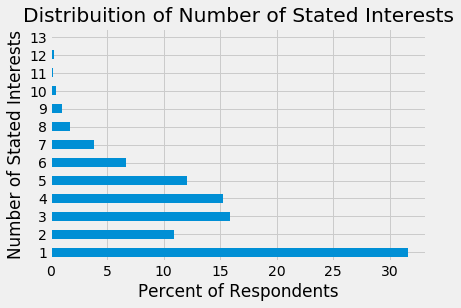

In [9]:
plt.style.use('fivethirtyeight')

grapher.plot(kind="barh")
plt.xlabel("Percent of Respondents")
plt.title("Distribuition of Number of Stated Interests")
plt.ylabel("Number of Stated Interests")
plt.show()

From the above graph, it is clear that many respondents had multiple interests. We will now see what percentage of respondents are interested in moble or web development.

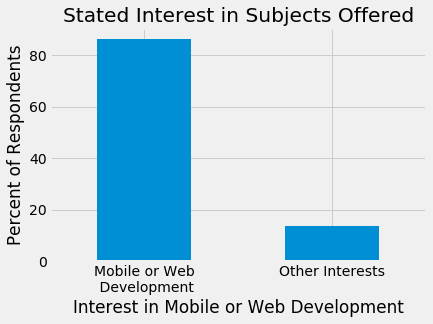

In [10]:
targets=interests_no_null.str.contains("Mobile Developer|Web Developer")

plt.style.use("fivethirtyeight")
visual=targets.value_counts(normalize=True)*100
visual.plot(kind='bar')
plt.xticks([0,1], ["Mobile or Web\n Development", "Other Interests"], rotation=0)
plt.xlabel("Interest in Mobile or Web Development")
plt.ylabel("Percent of Respondents")
plt.title("Stated Interest in Subjects Offered")
plt.show()

We can see that a large number of the survey respondents have stated an interest in the services we offer. With this information we next need to see what markets these respondents live in. 

### Indepth Analysis

Now we must look at specifics of individual markets in order to find which is the best for targeted advertising. This will be done by examining the number of coders who responded (a metric of how many are trying to learn to code) and how much each person spent on coding education.

In [13]:
countries=FCC['CountryLive'].dropna()
countries_freq=countries.value_counts()
countries_freq.head()

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Name: CountryLive, dtype: int64

A coursory glance would tell us that the markets with the highest potentials are the United States and India. However, we should look at the amount spent by customers in these 

In [14]:
copied=FCC.copy()
copied[copied['MonthsProgramming']==0]=1
copied['Money/Month']=copied['MoneyForLearning']/copied['MonthsProgramming']
copied=copied[copied['Money/Month'].notnull()]
copied=copied[copied['CountryLive'].notnull()]

In [15]:
grouped_mean= copied.groupby("CountryLive").mean()
grouped_mean[ 'Money/Month'].sort_values(ascending=False).head(10)

CountryLive
Yemen          5000.000000
Jamaica         518.247863
Spain           427.184483
Austria         397.392153
Malawi          378.583333
New Zealand     289.304686
Niger           270.082143
Hong Kong       235.906168
Luxembourg      232.146614
Taiwan          212.273011
Name: Money/Month, dtype: float64

In [16]:
grouped_median= copied.groupby("CountryLive").median()
grouped_median[ 'Money/Month'].sort_values(ascending=False).head(50)

CountryLive
Yemen                       5000.000000
Malawi                       378.583333
Madagascar                   200.000000
Cayman Islands               175.000000
Hawaii                       100.000000
Somalia                       77.500000
Papua New Guinea              62.750000
Rwanda                        50.000000
Iraq                          37.500000
Turkmenistan                  32.051282
Uganda                        30.555556
Tanzania                      29.166667
Martinique                    25.000000
Angola                        25.000000
Armenia                       20.833333
Mongolia                      18.750000
Taiwan                        18.333333
Senegal                       18.333333
Luxembourg                    15.384615
Gambia                        12.500000
Benin                         12.500000
Azerbaijan                    10.000000
Greenland                     10.000000
Cyprus                         9.062500
Gabon                       

One thing to note from the results is that it seems that small, impoverished countries are the highest spending. Additionally, the medians and the means are the same for the top 10 spending countries. This means that these high numbers are generated by one or two customers meaning they are not meaningful data points. In order to ignore this, we will focus on the 4 largest markets: United States, India, the United Kingdom, and Canada in that order. 

In [17]:
grouped_mean['Money/Month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]



CountryLive
United States of America    211.711051
India                        65.985479
United Kingdom               57.530971
Canada                      118.247123
Name: Money/Month, dtype: float64

We can see that focusing on North American markets appears to be the most profitable since the United States and Canada spent the most on programming education. 

In [18]:
four=copied[copied['CountryLive'].str.contains("United States of America|India|United Kingdom|Canada", na=False)]

four['CountryLive'].value_counts()

United States of America    5237
India                       1206
United Kingdom               676
Canada                       562
Name: CountryLive, dtype: int64

In [19]:
import seaborn as sns

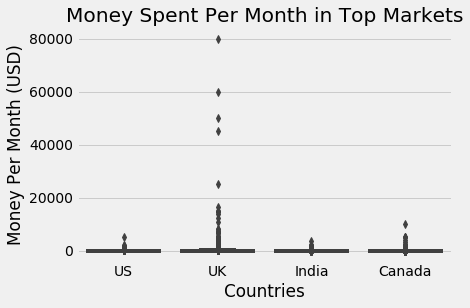

In [20]:
sns.boxplot(y='Money/Month', x='CountryLive', data=four)
plt.title("Money Spent Per Month in Top Markets")
plt.xlabel("Countries")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.ylabel("Money Per Month (USD)")
plt.show()

From the box plot we can see that anybody spending more than 2,500 USD a month is an extreme outlier, so we will investigate these data. Though it is possible that all these outliers attended a bootcamp (which can be quite expensive), we will investigate and remove those who spent this much and didn't attend a boot camp. 

In [ ]:
investigate=four[four['Money/Month']>=2500]
investigate.head()


We can see that 74 respondents spend more than 2500 per month. We will drop those who didn't attend a coding boot camp. So we will now remove those who didn't attend a boot camp in this time. 

In [ ]:
no_bootcamp = four[ 
    (four['Money/Month'] >= 6000) &
    (four['AttendedBootcamp'] == 0)
]

four = four.drop(no_bootcamp.index)

Now that we have removed those who spent a strangely high amount of money, we will now look for more consistent coders since they offer a more regular stream of revenue. Additionally, new coders could be trying many different services which would artificially inflate the money they spent. 

In [ ]:
less_than_3_months = four[
     
    (four['Money/Month'] >= 6000) &
    (four['MonthsProgramming'] <= 3)
]

four = four.drop(less_than_3_months.index)

In [ ]:
sns.boxplot(y='Money/Month', x='CountryLive', data=four)
plt.title("Money Spent Per Month in Top Markets")
plt.xlabel("Countries")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.ylabel("Money Per Month (USD)")
plt.show()

In [ ]:
final=four.groupby('CountryLive').mean()
final['Money/Month'].head()

### Conclusion

From this, the two markets that are best to advertise in are the United States and Canada. Due to the larger sample size of the US, we will want to allocate more of our budget to that region since it has the highest average cost per month. Additionally, it is the larger of the two population wise. 

Advertising in the US and Canada also allows us to forge relationships within one region so we can capitalize on the lack of a language barrier which will mean little needs to change for targeted ads across reagions. 